In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, clear_output
import time


In [2]:
image_folder = "images"
images = sorted(os.listdir(image_folder))

print("Total frames:", len(images))



Total frames: 41


In [3]:
fgbg = cv2.createBackgroundSubtractorMOG2(
    history=50,
    varThreshold=40,
    detectShadows=False
)


In [4]:
results = []

for img_name in images:
    
    frame = cv2.imread(os.path.join(image_folder, img_name))
    
    # Apply background subtraction
    fgmask = fgbg.apply(frame)
    
    # Remove noise
    kernel = np.ones((3,3), np.uint8)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_DILATE, kernel)
    
    # Find contours (moving objects)
    contours, _ = cv2.findContours(
        fgmask,
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
    )
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        
        # Filter small noise
        if area > 400:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
    
    results.append(frame)


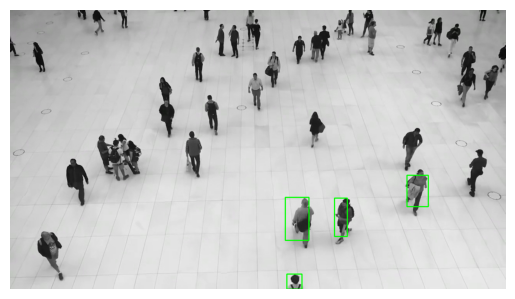

In [5]:
for frame in results:
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.05)
